In [ ]:
import os
import sys

# Clone or pull part
repo_url = "https://github.com/fraco03/6D_pose.git"
repo_dir = "/kaggle/working/6D_pose"   #Modify here for kaggle
branch = "pose_rgbd"

# Clone if missing
if not os.path.exists(repo_dir):
    !git clone -b {branch} {repo_url}
    print(f"Cloned {repo_url} to {repo_dir}")
else:
    %cd {repo_dir}
    !git fetch origin
    !git checkout {branch}
    !git reset --hard origin/{branch}
    # %cd ..
    print(f"Updated {repo_url} to {repo_dir}")

# Add repository to Python path
if repo_dir not in sys.path:
    sys.path.insert(0, repo_dir)


In [ ]:
%cd ..
!gdown --fuzzy https://drive.google.com/file/d/1zNthSyiBdPUfn7BmUKPbKoGgQdG1vGnS/view?usp=drive_link -O Linemod_preprocessed.zip
!unzip Linemod_preprocessed.zip
%cd 6D_pose

In [ ]:
from google.colab import drive
from utils.load_data import mount_drive

# Mounting part
mount_drive()

In [ ]:
!pip install ultralytics

# Full inference pipeline

In [ ]:
import sys

sys.path.append("..")

In [ ]:
from importlib import reload
import utils

reload(utils)

In [1]:
import sys

sys.path.append("..")

from pathlib import Path
from src.inference.inference_pipeline import RGBDPoseInferencePipeline
import torch
import importlib

importlib.reload(sys.modules['src.inference.inference_pipeline'])

import numpy as np
import yaml



from src.inference.inference_pipeline import RGBDPoseInferencePipeline

YOLO_PATH = Path("../notebooks/yolo/yolo11s_autolabel_final_with_80_th/weights/best.pt").resolve()
POSE_MODEL_PATH = Path("../notebooks/pose_rgbd/RGBD_final/best_model.pth").resolve()
MODELS_PATH = Path("../Linemod_preprocessed/models/").resolve()

print("Setting up inference pipeline...")
print(f"YOLO Path: {YOLO_PATH}")
print(f"Pose Model Path: {POSE_MODEL_PATH}")

pipeline = RGBDPoseInferencePipeline(
    yolo_path=YOLO_PATH,
    pose_model_path=POSE_MODEL_PATH,
    models_path=MODELS_PATH,
    device='cuda' if torch.cuda.is_available() else 'cpu',
    conf_threshold=0.5
)


Setting up inference pipeline...
YOLO Path: F:\Magistrale\Advanced Machine Learning\6D_pose\notebooks\yolo\yolo11s_autolabel_final_with_80_th\weights\best.pt
Pose Model Path: F:\Magistrale\Advanced Machine Learning\6D_pose\notebooks\pose_rgbd\RGBD_final\best_model.pth
📦 Loading YOLO model...
📦 Loading RGB-D Pose model...
📦 Caching 3D model bounding boxes...
📦 Caching 3D model points...
✅ Pipeline initialization complete.


In [2]:
# Read cam_K from file
CAM_K_PATH = Path("./sample/info.yml")
with open(CAM_K_PATH, 'r') as f:
    info_data = yaml.safe_load(f)
cam_info = info_data.get(0) or info_data.get('0')
cam_K = np.array(cam_info['cam_K']).reshape(3, 3).astype(np.float32)

# Run inference on sample folder
SAMPLE_FOLDER = Path("./sample").resolve()
print(f"Running inference on sample folder: {SAMPLE_FOLDER}")
(results, vis_img) = pipeline.run(sample_folder=SAMPLE_FOLDER, cam_K=cam_K)

print("Inference completed.")

Running inference on sample folder: F:\Magistrale\Advanced Machine Learning\6D_pose\inference\sample
Inference completed.


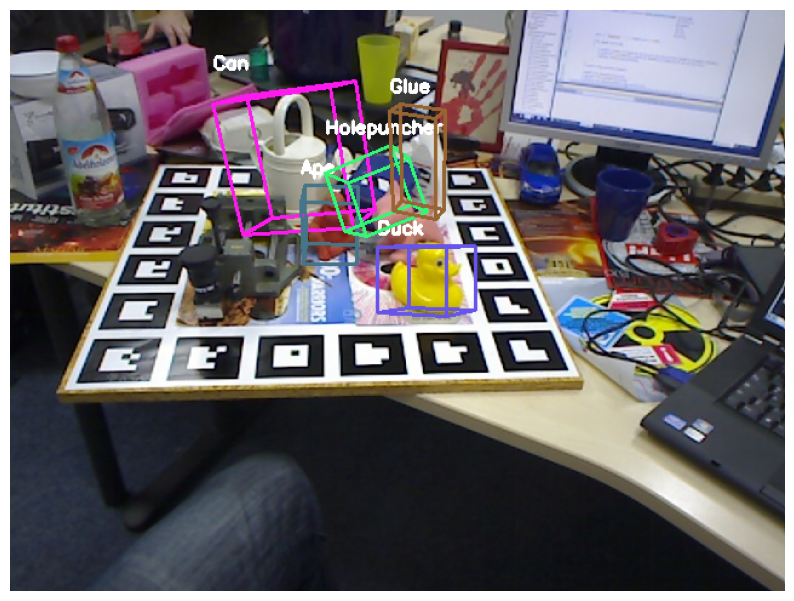

In [ ]:
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('RGBD')
plt.show()

In [5]:
import importlib

importlib.reload(sys.modules['src.inference.inference_pipeline'])

from src.inference.inference_pipeline import RGBPoseInferencePipeline

YOLO_PATH = Path("../notebooks/yolo/yolo11s_autolabel_final_with_80_th/weights/best.pt").resolve()
ROT_MODEL_PATH = Path("../notebooks/pose_rgb/RGB_run/best_model_rot.pth").resolve()
TRANS_MODEL_PATH = Path("../notebooks/pose_rgb/RGB_run/best_model_trans.pth").resolve()
MODELS_PATH = Path("../Linemod_preprocessed/models/").resolve()

print("Setting up inference pipeline...")
print(f"YOLO Path: {YOLO_PATH}")
print(f"Pose Model Path: {POSE_MODEL_PATH}")

pipeline = RGBPoseInferencePipeline(
    yolo_path=YOLO_PATH,
    rot_model_path=ROT_MODEL_PATH,
    trans_model_path=TRANS_MODEL_PATH,
    models_path=MODELS_PATH,
    device='cuda' if torch.cuda.is_available() else 'cpu',
    conf_threshold=0.5
)

Setting up inference pipeline...
YOLO Path: F:\Magistrale\Advanced Machine Learning\6D_pose\notebooks\yolo\yolo11s_autolabel_final_with_80_th\weights\best.pt
Pose Model Path: F:\Magistrale\Advanced Machine Learning\6D_pose\notebooks\pose_rgbd\RGBD_final\best_model.pth
📦 Loading YOLO model...
📦 Loading RGB Pose models (Rotation & Translation)...
🔒 ResNet backbone frozen.
📦 Caching 3D model bounding boxes...
📦 Caching 3D model points...
✅ Pipeline initialization complete.


In [6]:
# Read cam_K from file
CAM_K_PATH = Path("./sample/info.yml")
with open(CAM_K_PATH, 'r') as f:
    info_data = yaml.safe_load(f)
cam_info = info_data.get(0) or info_data.get('0')
cam_K = np.array(cam_info['cam_K']).reshape(3, 3).astype(np.float32)

# Run inference on sample folder
SAMPLE_FOLDER = Path("./sample").resolve()
print(f"Running inference on sample folder: {SAMPLE_FOLDER}")
(results, vis_img) = pipeline.run(sample_folder=SAMPLE_FOLDER, cam_K=cam_K)

print("Inference completed.")

Running inference on sample folder: F:\Magistrale\Advanced Machine Learning\6D_pose\inference\sample
Inference completed.


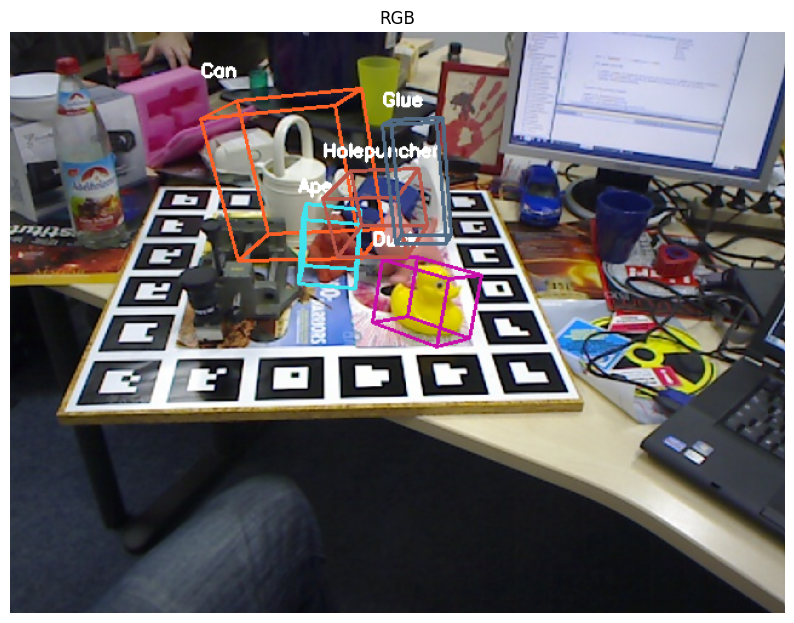

In [7]:
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('RGB')
plt.show()

In [16]:
import importlib

importlib.reload(sys.modules['src.inference.inference_pipeline'])

from src.inference.inference_pipeline import PointNetInferencePipeline

YOLO_PATH = Path("../notebooks/yolo/yolo11s_autolabel_final_with_80_th/weights/best.pt").resolve()
POSE_MODEL_PATH = Path("../notebooks/pose_pointnet/PointNet_final/best_model.pth").resolve()
MODELS_PATH = Path("../Linemod_preprocessed/models/").resolve()

print("Setting up inference pipeline...")
print(f"YOLO Path: {YOLO_PATH}")
print(f"Pose Model Path: {POSE_MODEL_PATH}")

pipeline = PointNetInferencePipeline(
    yolo_path=YOLO_PATH,
    pointnet_model_path=POSE_MODEL_PATH,
    models_path=MODELS_PATH,
    device='cuda' if torch.cuda.is_available() else 'cpu',
    conf_threshold=0.5
)

Setting up inference pipeline...
YOLO Path: F:\Magistrale\Advanced Machine Learning\6D_pose\notebooks\yolo\yolo11s_autolabel_final_with_80_th\weights\best.pt
Pose Model Path: F:\Magistrale\Advanced Machine Learning\6D_pose\notebooks\pose_pointnet\PointNet_final\best_model.pth
🔥 Loading YOLO model (Detector)...
🔥 Loading PointNet Pose model (Geometry)...
📦 Caching 3D model bounding boxes...
📦 Caching 3D model points...
✅ Pipeline initialization complete.


In [17]:
# Read cam_K from file
CAM_K_PATH = Path("./sample/info.yml")
with open(CAM_K_PATH, 'r') as f:
    info_data = yaml.safe_load(f)
cam_info = info_data.get(0) or info_data.get('0')
cam_K = np.array(cam_info['cam_K']).reshape(3, 3).astype(np.float32)

# Run inference on sample folder
SAMPLE_FOLDER = Path("./sample").resolve()
print(f"Running inference on sample folder: {SAMPLE_FOLDER}")
(results, vis_img) = pipeline.run(sample_folder=SAMPLE_FOLDER, cam_K=cam_K)

print("Inference completed.")

Running inference on sample folder: F:\Magistrale\Advanced Machine Learning\6D_pose\inference\sample
Inference completed.


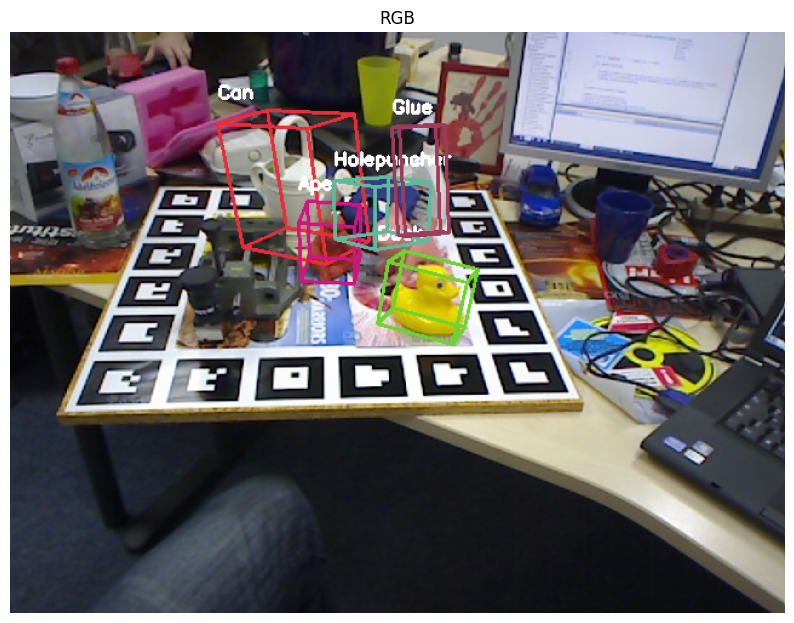

In [ ]:
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('PointNet')
plt.show()

In [21]:
import importlib

importlib.reload(sys.modules['src.inference.inference_pipeline'])

from src.inference.inference_pipeline import DenseFusionInferencePipeline

YOLO_PATH = Path("../notebooks/yolo/yolo11s_autolabel_final_with_80_th/weights/best.pt").resolve()
POSE_MODEL_PATH = Path("../notebooks/dense_fusion/dense_final/best_model.pth").resolve()
MODELS_PATH = Path("../Linemod_preprocessed/models/").resolve()

print("Setting up inference pipeline...")
print(f"YOLO Path: {YOLO_PATH}")
print(f"Pose Model Path: {POSE_MODEL_PATH}")

pipeline = DenseFusionInferencePipeline(
    yolo_path=YOLO_PATH,
    densefusion_model_path=POSE_MODEL_PATH,
    models_path=MODELS_PATH,
    device='cuda' if torch.cuda.is_available() else 'cpu',
    conf_threshold=0.5
)

Setting up inference pipeline...
YOLO Path: F:\Magistrale\Advanced Machine Learning\6D_pose\notebooks\yolo\yolo11s_autolabel_final_with_80_th\weights\best.pt
Pose Model Path: F:\Magistrale\Advanced Machine Learning\6D_pose\notebooks\dense_fusion\dense_final\best_model.pth
🔥 Loading YOLO model (Detector)...
🔥 Loading DenseFusion model (RGB-D Fusion)...
📦 Caching 3D model bounding boxes...
📦 Caching 3D model points...
✅ Pipeline initialization complete.


In [22]:
# Read cam_K from file
CAM_K_PATH = Path("./sample/info.yml")
with open(CAM_K_PATH, 'r') as f:
    info_data = yaml.safe_load(f)
cam_info = info_data.get(0) or info_data.get('0')
cam_K = np.array(cam_info['cam_K']).reshape(3, 3).astype(np.float32)

# Run inference on sample folder
SAMPLE_FOLDER = Path("./sample").resolve()
print(f"Running inference on sample folder: {SAMPLE_FOLDER}")
(results, vis_img) = pipeline.run(sample_folder=SAMPLE_FOLDER, cam_K=cam_K)

print("Inference completed.")

Running inference on sample folder: F:\Magistrale\Advanced Machine Learning\6D_pose\inference\sample
Inference completed.


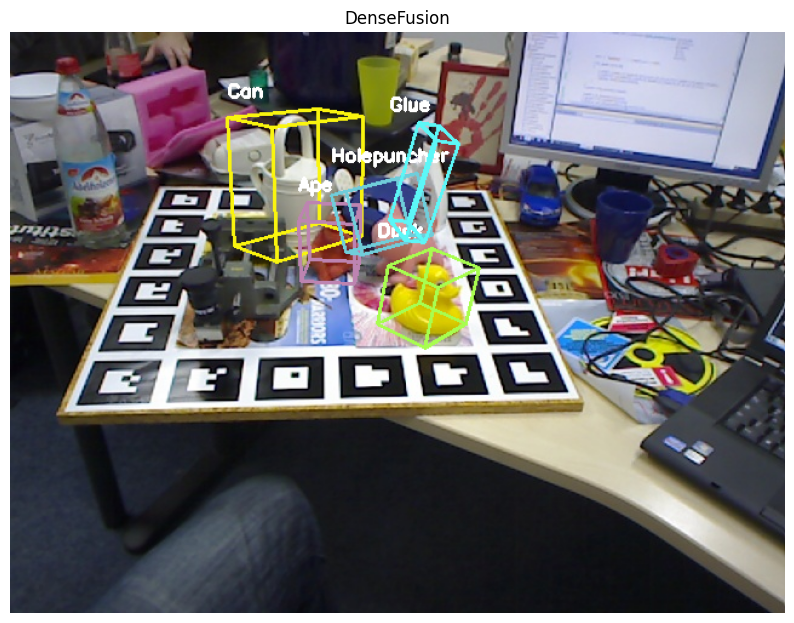

In [23]:
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('DenseFusion')
plt.show()